In [1]:
! pip install awswrangler

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached awswrangler-2.7.0-py3-none-any.whl (176 kB)
  Using cached pandas-1.2.4-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)
  Using cached redshift_connector-2.0.878-py3-none-any.whl (87 kB)
  Using cached pg8000-1.18.0-py3-none-any.whl (34 kB)
  Using cached scramp-1.2.2-py3-none-any.whl (7.8 kB)
  Using cached asn1crypto-1.4.0-py2.py3-none-any.whl (104 kB)
ERROR: redshift-connector 2.0.878 has requirement pytz<2021.9,>=2020.1, but you'll have pytz 2019.3 which is incompatible.
  Attempting uninstall: pandas
    Found existing

In [2]:
import awswrangler as wr
import pandas as pd
from datetime import date

In [3]:
!pip install wntr

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached wntr-0.3.0-py3-none-any.whl (3.9 MB)


In [4]:
import wntr 
import matplotlib.pyplot as plt

In [5]:
dfp = pd.read_csv('pressure.zip')

In [7]:
dff = pd.read_csv('flow.zip')

In [12]:
i=1
nodes = [2,9,10,11,12,13,21,22,23,31,32]
pressure = pd.DataFrame()
for k in nodes:
    path = f's3://cactus-leakdata-s3/Net1_CMH/Scenario-{i}/Pressures/Node_{k}.csv'
    p = wr.s3.read_csv(path=path,usecols=['Value'], low_memory = False)
    p.columns = [str(k)]
    pressure= pd.concat([pressure,p], axis =1)

In [14]:
dfp

,10,11,12,13,14,15,16,17,18,19,...,30,31,32,4,5,6,7,8,9,1
0,65.103,65.072,65.037,64.894,64.942,64.923,64.923,65.110,65.833,66.185,...,64.531,64.569,64.655,66.034,65.552,65.268,65.247,65.165,65.136,0.0
1,66.025,66.000,65.973,65.857,65.905,65.896,65.899,66.083,66.632,66.920,...,65.565,65.600,65.676,66.791,66.386,66.150,66.132,66.071,66.050,0.0
2,66.935,66.916,66.895,66.812,66.841,66.834,66.834,66.977,67.427,67.633,...,66.554,66.581,66.639,67.528,67.216,67.034,67.020,66.972,66.954,0.0
3,67.303,67.287,67.269,67.191,67.223,67.212,67.212,67.297,67.686,67.892,...,66.982,67.005,67.055,67.811,67.542,67.384,67.373,67.333,67.319,0.0
4,67.740,67.725,67.710,67.649,67.676,67.668,67.668,67.765,68.079,68.244,...,67.472,67.492,67.535,68.172,67.944,67.811,67.801,67.766,67.753,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17519995,64.266,64.116,64.015,63.294,63.929,63.927,64.004,64.508,65.449,65.966,...,64.049,64.152,64.235,65.885,65.294,64.721,64.625,64.467,64.330,0.0
17519996,64.671,64.525,64.420,63.680,64.389,64.388,64.461,64.877,65.803,66.278,...,64.515,64.630,64.718,66.195,65.633,65.088,64.998,64.856,64.729,0.0
17519997,65.479,65.368,65.287,64.748,65.208,65.205,65.245,65.559,66.354,66.791,...,65.344,65.426,65.495,66.743,66.277,65.829,65.754,65.634,65.528,0.0
17519998,66.154,66.062,65.998,65.554,65.909,65.906,65.948,66.274,66.930,67.284,...,65.980,66.062,66.124,67.234,66.837,66.454,66.391,66.288,66.196,0.0


In [ ]:
import os
import boto3


pressure = pd.DataFrame()


nodes = [2,9,10,11,12,13,21,22,23,31,32]
for i in range(1,1001):  
    sp = pd.DataFrame()
    for k in nodes:
        
        path = f's3://cactus-leakdata-s3/Net1_CMH/Scenario-{i}/Pressures/Node_{k}.csv'
        p = wr.s3.read_csv(path=path,usecols=['Value'], low_memory = False)
        p.columns = [str(k)]
        sp= pd.concat([sp,p], axis =1)
#         sp.reset_index(drop=True, inplace=True)
#     links = [9,10,11,12,21,22,31,110,111,112,113,121,122]
    pressure= pd.concat([pressure,sp], axis=0)

In [ ]:
import os
import boto3


flow = pd.DataFrame()

links = [9,10,11,12,21,22,31,110,111,112,113,121,122]
for i in range(1,1001):  
    sf = pd.DataFrame()
    for k in nodes:
        
        path = f's3://cactus-leakdata-s3/Net1_CMH/Scenario-{i}/Flows/Link_{k}.csv'
        f = wr.s3.read_csv(path=path,usecols=['Value'], low_memory = False)
        f.columns = [str(k)]
        sf= pd.concat([sf,f], axis =1)
#         sp.reset_index(drop=True, inplace=True)
#     links = [9,10,11,12,21,22,31,110,111,112,113,121,122]
    flow= pd.concat([flow,sf], axis=0)

In [45]:
pressure

,2,9,10,11,12,13,21,22,23,31,32
0,36.576,0.0,92.944,89.658,82.317,83.756,84.905,83.847,85.278,83.177,79.205
1,37.265,0.0,93.525,90.288,83.008,84.478,85.796,84.558,86.003,84.222,79.952
2,37.985,0.0,94.188,91.007,83.731,85.228,86.611,85.311,86.759,85.148,80.731
3,38.741,0.0,94.841,91.715,84.487,85.989,87.385,86.073,87.523,85.873,81.500
4,39.505,0.0,95.488,92.417,85.252,86.766,88.313,86.856,88.304,86.937,82.286
...,...,...,...,...,...,...,...,...,...,...,...
17515,45.720,0.0,116.139,114.300,115.767,116.647,114.974,116.491,117.930,113.995,110.468
17516,45.720,0.0,116.760,115.003,116.542,117.431,115.785,117.300,118.738,114.868,111.339
17517,45.720,0.0,118.620,117.111,118.877,119.844,118.230,119.746,121.177,117.493,113.992
17518,45.720,0.0,120.944,119.750,121.761,122.849,121.218,122.740,124.212,120.580,117.220


In [7]:
import os
import boto3
pressure = pd.DataFrame()
flow = pd.DataFrame()
Mode_Simulation = 'PDD'
s3 = boto3.resource('s3')
for i in range(1,1001):
    s3.meta.client.download_file('cactus-leakdata-s3', f'Net1_CMH/Scenario-{i}/Net1_CMH_Scenario-{i}.inp', f'/tmp/Net1_CMH_Scenario-{i}.inp')
    wn = wntr.network.WaterNetworkModel(f'/tmp/Net1_CMH_Scenario-{i}.inp')
    print(i)
    sim = wntr.sim.WNTRSimulator(wn, mode=Mode_Simulation)
    results = sim.run_sim()
    p = results.node['pressure']
    f = results.link['flowrate']
#     if results.node['pressure'].shape !=(17521, 11):
#         print(results.node['pressure'].shape,i)
    flow= pd.concat([flow,f])
    pressure= pd.concat([pressure,p])

    file_name = f'/tmp/Net1_CMH_Scenario-{i}.inp'
    if os.path.isfile(file_name):
        os.remove(file_name)
    

1


NotImplementedError: Pump speeds other than 1.0 are not yet supported.

In [11]:
import os
import boto3

pressure = pd.DataFrame()
flow = pd.DataFrame()
s3 = boto3.resource('s3')
for i in range(3,4):
    s3.meta.client.download_file('cactus-leakdata-s3', f'Hanoi_CMH/Scenario-{i}/Hanoi_CMH_Scenario-{i}.inp', f'/tmp/Hanoi_CMH_Scenario-{i}.inp')
    wn = wntr.network.WaterNetworkModel(f'/tmp/Hanoi_CMH_Scenario-{i}.inp')
    wn.options.time.hydraulic_timestep = 1800
    wn.options.time.report_timestep = 1800
    sim = wntr.sim.WNTRSimulator(wn)
    results = sim.run_sim()
    p = results.node['pressure'].round(decimals=3)
    p.drop(p.tail(1).index,inplace = True)
#     f = results.link['flowrate'].round(decimals=3)
#     f.drop(f.tail(1).index,inplace = True)
#     if results.node['pressure'].shape !=(17521, 11):
#         print(results.node['pressure'].shape,i)
#     flow= pd.concat([flow,f])
    pressure= pd.concat([pressure,p])

    file_name = f'/tmp/Hanoi_CMH_Scenario-{i}.inp'
    if os.path.isfile(file_name):
        os.remove(file_name)

In [5]:
import os
import boto3

pressure = pd.DataFrame()
flow = pd.DataFrame()
s3 = boto3.resource('s3')
for i in range(1,1001):
    s3.meta.client.download_file('cactus-leakdata-s3', f'Hanoi_CMH/Scenario-{i}/Hanoi_CMH_Scenario-{i}.inp', f'/tmp/Hanoi_CMH_Scenario-{i}.inp')
    wn = wntr.network.WaterNetworkModel(f'/tmp/Hanoi_CMH_Scenario-{i}.inp')
    sim = wntr.sim.WNTRSimulator(wn)
    results = sim.run_sim()
    p = results.node['pressure'].round(decimals=3)
    p.drop(p.tail(1).index,inplace = True)
    f = results.link['flowrate'].round(decimals=3)
    f.drop(f.tail(1).index,inplace = True)
#     if results.node['pressure'].shape !=(17521, 11):
#         print(results.node['pressure'].shape,i)
    flow= pd.concat([flow,f])
    pressure= pd.concat([pressure,p])

    file_name = f'/tmp/Hanoi_CMH_Scenario-{i}.inp'
    if os.path.isfile(file_name):
        os.remove(file_name)

In [6]:
pressure.shape

(105120, 32)

In [12]:
pressure.reset_index(inplace=True)

In [10]:
pressure.head(50)

,index,10,11,12,13,14,15,16,17,18,...,30,31,32,4,5,6,7,8,9,1
0,0,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
1,300,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
2,600,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
3,900,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
4,1200,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
5,1500,66.651,66.578,66.557,66.501,66.575,66.573,66.591,66.847,67.229,...,66.429,66.445,66.477,67.309,67.214,66.803,66.768,66.727,66.677,0.0
6,1800,67.278,67.213,67.193,67.147,67.228,67.228,67.258,67.480,67.789,...,67.161,67.175,67.202,67.831,67.752,67.406,67.376,67.342,67.300,0.0
7,2100,67.278,67.213,67.193,67.147,67.228,67.228,67.258,67.480,67.789,...,67.161,67.175,67.202,67.831,67.752,67.406,67.376,67.342,67.300,0.0
8,2400,67.278,67.213,67.193,67.147,67.228,67.228,67.258,67.480,67.789,...,67.161,67.175,67.202,67.831,67.752,67.406,67.376,67.342,67.300,0.0
9,2700,67.278,67.213,67.193,67.147,67.228,67.228,67.258,67.480,67.789,...,67.161,67.175,67.202,67.831,67.752,67.406,67.376,67.342,67.300,0.0


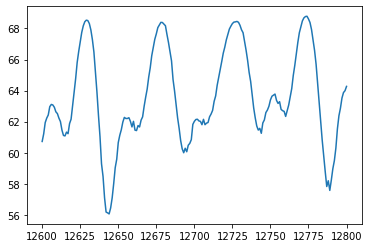

In [13]:
ax = pressure.loc[12600:12800,'19'].plot()

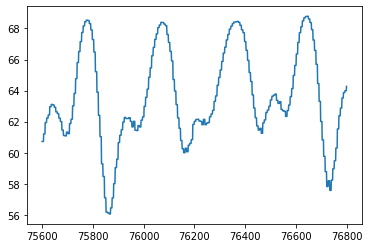

In [8]:
ax = pressure.loc[12600*6:12800*6,'19'].plot()

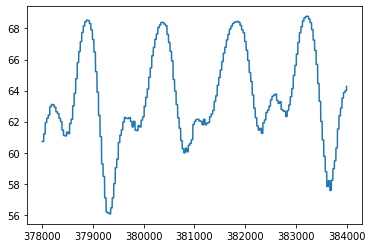

In [11]:
ax = pressure.loc[12600*30:12800*30,'19'].plot()

In [8]:
os.listdir('/tmp')

[]

In [17]:
dfp[:-1000]

,10,11,12,13,21,22,23,31,32,9,2
0,92.94415,89.658160,82.317300,83.755460,84.904850,83.847145,85.278480,83.176560,79.205050,0.0,36.576000
1,93.52501,90.288020,83.007880,84.477840,85.795490,84.558060,86.002560,84.222270,79.952330,0.0,37.264700
2,94.18837,91.007430,83.730670,85.228080,86.610710,85.310790,86.758500,85.148180,80.731094,0.0,37.985348
3,94.84072,91.714960,84.487110,85.988850,87.384674,86.072945,87.522995,85.873640,81.500810,0.0,38.741300
4,95.48759,92.416626,85.251880,86.766350,88.313360,86.856410,88.304450,86.937070,82.285080,0.0,39.504974
...,...,...,...,...,...,...,...,...,...,...,...
17519995,92.50632,84.211494,83.483730,84.994050,84.195770,85.081154,86.547500,83.868070,80.381230,0.0,37.730644
17519996,93.16000,85.002740,84.298000,85.817910,85.081726,85.935165,87.394905,84.789430,81.302444,0.0,38.543324
17519997,93.79413,85.770485,85.130936,86.648460,85.894810,86.757324,88.220010,85.607796,82.114110,0.0,39.377018
17519998,94.41165,86.518290,85.952000,87.462140,86.634300,87.543810,89.015440,86.303535,82.834220,0.0,40.200560


In [ ]:
dfp.shape

In [10]:
print(['ll']*10)

['ll', 'll', 'll', 'll', 'll', 'll', 'll', 'll', 'll', 'll']


In [11]:
scenario = []
for i in range(1,1001):    
    scenario.extend([f'{i}']*8760*2)

In [12]:
len(scenario)

17520000

In [6]:
# compression_opts = dict(method='zip',
#                         archive_name='pressure.csv')  
# pressure.to_csv('pressure.zip', index=False,
#           compression=compression_opts)

In [ ]:
dfp.to_csv()

In [7]:
# compression_opts = dict(method='zip',
#                         archive_name='flow.csv')  
# flow.to_csv('flow.zip', index=False,
#           compression=compression_opts)

In [ ]:
your_bucket.download_file('k.png', '/Users/username/Desktop/k.png')

In [1]:
!zip -r -X sagemaker.zip /files

/bin/sh: 1: zip: not found


In [2]:
sudo yum install zip unzip

SyntaxError: invalid syntax (<ipython-input-2-d205b0a854d8>, line 1)

In [ ]:
import shutil
with open(file_name, 'wb') as f:
    with requests.get(url, stream=True) as r:
        shutil.copyfileobj(r.raw, f)

In [3]:
import sagemaker
sagemaker.Session().upload_data("pressure.zip",'cactus-leakdata-s3','Hanoi-Data')


's3://cactus-leakdata-s3/Hanoi-Data/pressure.zip'

In [4]:
import sagemaker
sagemaker.Session().upload_data("flow.zip",'cactus-leakdata-s3','Hanoi-Data')

's3://cactus-leakdata-s3/Hanoi-Data/flow.zip'

In [1]:
import sagemaker
for i in range(1,5):
    sagemaker.Session().upload_data("flow_test"+str(i)+".zip",'cactus-leakdata-s3','Test_Data')
    sagemaker.Session().upload_data("pressure_test"+str(i)+".zip",'cactus-leakdata-s3','Test_Data')
    